In [2]:
import sqlite3
import pandas as pd
from sqlalchemy import create_engine



In [3]:
# Engine oluşturma
engine = create_engine('sqlite:///chinook.db')

# Bağlantıyı test etme
connection = engine.connect()


In [15]:
from sqlalchemy import text

# Bağlantıyı açın
connection = engine.connect()

# artists tablosundan ilk 10 satırı sorgulama
query = text("SELECT * FROM artists LIMIT 10")
artists = connection.execute(query)

# Sonuçları yazdırın
for artist in artists:
    print(artist)

# Bağlantıyı kapatın
connection.close()



(1, 'AC/DC')
(2, 'Accept')
(3, 'Aerosmith')
(4, 'Alanis Morissette')
(5, 'Alice In Chains')
(6, 'Antônio Carlos Jobim')
(7, 'Apocalyptica')
(8, 'Audioslave')
(9, 'BackBeat')
(10, 'Billy Cobham')


In [16]:
connection = engine.connect()

# albums tablosundaki toplam satır sayısını sorgulama
query = text("SELECT COUNT(*) FROM albums")
result = connection.execute(query).fetchone()[0]
print(f"Toplam albüm sayısı: {result}")

connection.close()


Toplam albüm sayısı: 347


In [17]:
connection = engine.connect()

# genres tablosundan GenreId'si 10'dan küçük olan satırları sorgulama
query = text("SELECT * FROM genres WHERE GenreId < 10")
genres = connection.execute(query)

# Sonuçları yazdırın
for genre in genres:
    print(genre)

connection.close()


(1, 'Rock')
(2, 'Jazz')
(3, 'Metal')
(4, 'Alternative & Punk')
(5, 'Rock And Roll')
(6, 'Blues')
(7, 'Latin')
(8, 'Reggae')
(9, 'Pop')


In [21]:
from sqlalchemy import create_engine, Column, Integer, String, ForeignKey
from sqlalchemy.orm import declarative_base, relationship, sessionmaker

# Base sınıfını doğru modülden alıyoruz
Base = declarative_base()

# Artist sınıfını tanımlıyoruz
class Artist(Base):
    __tablename__ = 'artists'
    ArtistId = Column(Integer, primary_key=True)
    Name = Column(String, nullable=False)  # Sanatçı adını boş geçemeyiz
    albums = relationship('Album', back_populates='artist')  # Album ile ilişki kuruyoruz

# Album sınıfını tanımlıyoruz
class Album(Base):
    __tablename__ = 'albums'
    AlbumId = Column(Integer, primary_key=True)
    Title = Column(String, nullable=False)  # Albüm başlığını boş geçemeyiz
    ArtistId = Column(Integer, ForeignKey('artists.ArtistId'))  # ForeignKey ile ilişki kuruyoruz
    artist = relationship('Artist', back_populates='albums')  # Artist ile ilişki kuruyoruz


In [22]:
# SQLAlchemy bağlantı motorunu oluşturuyoruz
engine = create_engine('sqlite:///chinook.db')

# Tabloları veritabanında oluşturuyoruz
Base.metadata.create_all(engine)

# Veritabanı bağlantısı için sessionmaker'ı tanımlıyoruz
Session = sessionmaker(bind=engine)
session = Session()

# ORM bağlantısının çalıştığını test edelim
artist = session.query(Artist).filter_by(Name='Metallica').first()
if artist:
    print(f"Sanatçı: {artist.Name}")
    for album in artist.albums:
        print(f"Albüm: {album.Title}")
else:
    print("Sanatçı bulunamadı.")


Sanatçı: Metallica
Albüm: Garage Inc. (Disc 1)
Albüm: Black Album
Albüm: Garage Inc. (Disc 2)
Albüm: Kill 'Em All
Albüm: Load
Albüm: Master Of Puppets
Albüm: ReLoad
Albüm: Ride The Lightning
Albüm: St. Anger
Albüm: ...And Justice For All


In [23]:
artists_a = session.query(Artist).filter(Artist.Name.like('A%')).all()
for artist in artists_a:
    print(artist.Name)


AC/DC
Accept
Aerosmith
Alanis Morissette
Alice In Chains
Antônio Carlos Jobim
Apocalyptica
Audioslave
Azymuth
A Cor Do Som
Aquaman
Aerosmith & Sierra Leone's Refugee Allstars
Avril Lavigne
Aisha Duo
Aaron Goldberg
Alberto Turco & Nova Schola Gregoriana
Anne-Sophie Mutter, Herbert Von Karajan & Wiener Philharmoniker
Academy of St. Martin in the Fields & Sir Neville Marriner
Academy of St. Martin in the Fields Chamber Ensemble & Sir Neville Marriner
Academy of St. Martin in the Fields, John Birch, Sir Neville Marriner & Sylvia McNair
Aaron Copland & London Symphony Orchestra
Academy of St. Martin in the Fields, Sir Neville Marriner & William Bennett
Antal Doráti & London Symphony Orchestra
Amy Winehouse
Academy of St. Martin in the Fields, Sir Neville Marriner & Thurston Dart
Adrian Leaper & Doreen de Feis


In [25]:
metallica_albums = session.query(Album).join(Artist).filter(Artist.Name == 'Metallica').all()
for album in metallica_albums:
    print(album.Title)


Garage Inc. (Disc 1)
Black Album
Garage Inc. (Disc 2)
Kill 'Em All
Load
Master Of Puppets
ReLoad
Ride The Lightning
St. Anger
...And Justice For All


In [26]:
from sqlalchemy import func

album_count_by_artist = session.query(Artist.Name, func.count(Album.AlbumId)) \
                               .join(Album) \
                               .group_by(Artist.ArtistId) \
                               .order_by(Artist.Name).all()

for artist, count in album_count_by_artist:
    print(f"{artist}: {count} albüm")


AC/DC: 2 albüm
Aaron Copland & London Symphony Orchestra: 1 albüm
Aaron Goldberg: 1 albüm
Academy of St. Martin in the Fields & Sir Neville Marriner: 1 albüm
Academy of St. Martin in the Fields Chamber Ensemble & Sir Neville Marriner: 1 albüm
Academy of St. Martin in the Fields, John Birch, Sir Neville Marriner & Sylvia McNair: 1 albüm
Academy of St. Martin in the Fields, Sir Neville Marriner & Thurston Dart: 1 albüm
Accept: 2 albüm
Adrian Leaper & Doreen de Feis: 1 albüm
Aerosmith: 1 albüm
Aisha Duo: 1 albüm
Alanis Morissette: 1 albüm
Alberto Turco & Nova Schola Gregoriana: 1 albüm
Alice In Chains: 1 albüm
Amy Winehouse: 2 albüm
Anne-Sophie Mutter, Herbert Von Karajan & Wiener Philharmoniker: 1 albüm
Antal Doráti & London Symphony Orchestra: 1 albüm
Antônio Carlos Jobim: 2 albüm
Apocalyptica: 1 albüm
Aquaman: 1 albüm
Audioslave: 3 albüm
BackBeat: 1 albüm
Barry Wordsworth & BBC Concert Orchestra: 1 albüm
Battlestar Galactica: 2 albüm
Battlestar Galactica (Classic): 1 albüm
Berliner Phi

In [27]:
import pandas as pd

invoices_df = pd.read_sql('SELECT * FROM invoices', engine)


In [28]:
revenue_by_country = invoices_df.groupby('BillingCountry')['Total'].sum().reset_index()
print(revenue_by_country)


    BillingCountry   Total
0        Argentina   37.62
1        Australia   37.62
2          Austria   42.62
3          Belgium   37.62
4           Brazil  190.10
5           Canada  303.96
6            Chile   46.62
7   Czech Republic   90.24
8          Denmark   37.62
9          Finland   41.62
10          France  195.10
11         Germany  156.48
12         Hungary   45.62
13           India   75.26
14         Ireland   45.62
15           Italy   37.62
16     Netherlands   40.62
17          Norway   39.62
18          Poland   37.62
19        Portugal   77.24
20           Spain   37.62
21          Sweden   38.62
22             USA  523.06
23  United Kingdom  112.86


In [29]:
top_5_customers = invoices_df.groupby('CustomerId')['Total'].sum().nlargest(5).reset_index()
print(top_5_customers)


   CustomerId  Total
0           6  49.62
1          26  47.62
2          57  46.62
3          45  45.62
4          46  45.62


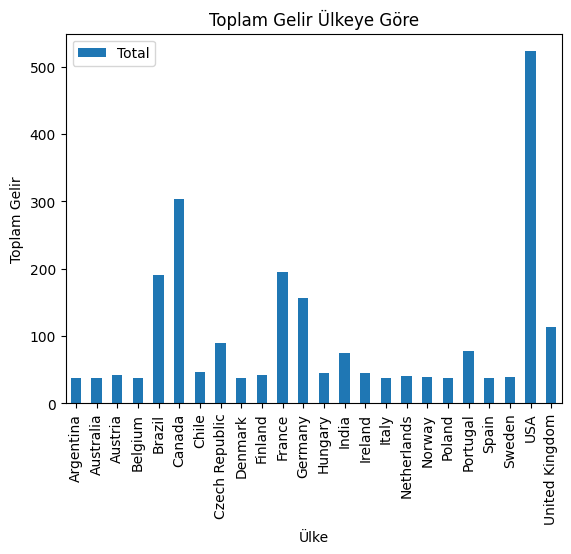

In [30]:
import matplotlib.pyplot as plt

revenue_by_country.plot(kind='bar', x='BillingCountry', y='Total')
plt.title('Toplam Gelir Ülkeye Göre')
plt.xlabel('Ülke')
plt.ylabel('Toplam Gelir')
plt.show()


In [35]:
from sqlalchemy import create_engine, text

# Veritabanına bağlantı kurma
connection = engine.connect()

# Top 5 şarkıyı sorgulama
query = text("""
    SELECT TrackId, COUNT(*) AS PlayCount
    FROM invoice_items
    GROUP BY TrackId
    ORDER BY PlayCount DESC
    LIMIT 5
""")
top_5_tracks = connection.execute(query)

# Sonuçları yazdırma
for track in top_5_tracks:
    print(track)




(2, 2)
(8, 2)
(9, 2)
(20, 2)
(32, 2)


In [36]:
query = text("""
    SELECT g.Name, AVG(t.Milliseconds) AS AvgLength
    FROM tracks t
    JOIN genres g ON t.GenreId = g.GenreId
    GROUP BY g.GenreId
""")
avg_track_length_by_genre = connection.execute(query)

# Sonuçları yazdırma
for genre in avg_track_length_by_genre:
    print(genre)



('Rock', 283910.0431765613)
('Jazz', 291755.3769230769)
('Metal', 309749.4438502674)
('Alternative & Punk', 234353.84939759035)
('Rock And Roll', 134643.5)
('Blues', 270359.77777777775)
('Latin', 232859.26252158894)
('Reggae', 247177.75862068965)
('Pop', 229034.10416666666)
('Soundtrack', 244370.88372093023)
('Bossa Nova', 219590.0)
('Easy Listening', 189164.20833333334)
('Heavy Metal', 297452.9285714286)
('R&B/Soul', 220066.8524590164)
('Electronica/Dance', 302985.8)
('World', 224923.82142857142)
('Hip Hop/Rap', 178176.2857142857)
('Science Fiction', 2625549.076923077)
('TV Shows', 2145041.0215053763)
('Sci Fi & Fantasy', 2911783.0384615385)
('Drama', 2575283.78125)
('Comedy', 1585263.705882353)
('Alternative', 264058.525)
('Classical', 293867.5675675676)
('Opera', 174813.0)


In [38]:
query = text("""
    SELECT g.Name, AVG(t.Milliseconds) AS AvgLength
    FROM tracks t
    JOIN genres g ON t.GenreId = g.GenreId
    GROUP BY g.GenreId
""")
avg_track_length_by_genre = connection.execute(query)

# Sonuçları yazdırma
for genre in avg_track_length_by_genre:
    print(genre)


('Rock', 283910.0431765613)
('Jazz', 291755.3769230769)
('Metal', 309749.4438502674)
('Alternative & Punk', 234353.84939759035)
('Rock And Roll', 134643.5)
('Blues', 270359.77777777775)
('Latin', 232859.26252158894)
('Reggae', 247177.75862068965)
('Pop', 229034.10416666666)
('Soundtrack', 244370.88372093023)
('Bossa Nova', 219590.0)
('Easy Listening', 189164.20833333334)
('Heavy Metal', 297452.9285714286)
('R&B/Soul', 220066.8524590164)
('Electronica/Dance', 302985.8)
('World', 224923.82142857142)
('Hip Hop/Rap', 178176.2857142857)
('Science Fiction', 2625549.076923077)
('TV Shows', 2145041.0215053763)
('Sci Fi & Fantasy', 2911783.0384615385)
('Drama', 2575283.78125)
('Comedy', 1585263.705882353)
('Alternative', 264058.525)
('Classical', 293867.5675675676)
('Opera', 174813.0)


In [43]:
# Step 8: Add a new artist and their albums to the database using ORM
new_artist = Artist(Name='New Artist')
session.add(new_artist)
session.commit()

# Adding an album to the new artist
new_album = Album(Title='New Album', artist=new_artist, ReleaseDate='2023-12-01')
session.add(new_album)
session.commit()
print("New artist and album have been added successfully.")


/var/folders/v3/p30r3kw502zc4g5s4k8j6td40000gn/T/ipykernel_8984/3061955857.py:4: SAWarning: Object of type <Album> not in session, add operation along 'Artist.albums' will not proceed
  session.commit()


TypeError: 'ReleaseDate' is an invalid keyword argument for Album

In [40]:
def get_most_recent_album_by_artist_orm(artist_name):
    # Verilen sanatçının en son albümünü ORM kullanarak alıyoruz
    recent_album = session.query(Album).join(Artist).filter(Artist.Name == artist_name).order_by(Album.ReleaseDate.desc()).first()
    return recent_album

# Metallica için en son albümü sorgulama
recent_album = get_most_recent_album_by_artist_orm('Metallica')
if recent_album:
    print(f"En son albüm: {recent_album.Title}")
else:
    print("Sanatçının albümleri bulunamadı.")


AttributeError: type object 'Album' has no attribute 'ReleaseDate'